# Extracción de datos de salinidad de la NOAA

## Integrantes:

* Emilio Echevarria
* Giuliana Berden

## Descripción

El programa esta diseñado para automatizar la descarga de datos de salidad de la pagina de la NOAA (http y ftp). Para ello se utilizaron las librerias:

* request 
* BeautifulSoup
* urllib

Ademas el programa grafica los datos de salindad de la NOAA en todo el mundo y si se desea grafica una serie temporal de la variable para un punto a eleccion en el mundo. Para ello se utilizaron las librerias:

* mpl_toolkits.basemap 
* matplotlib
* netCDF4 
* numpy

NOTA: El archivo de salinidad de la NOAA con el cual se corre el ejemplo no fue cargado al git por su peso. El url es:  'http://www.esrl.noaa.gov/psd/cgi-bin/db_search/DBListFiles.pl?did=98&tid=53069&vid=1914'

In [16]:
# Automatizando la bajada de datos.. ÉXITO! :)

import requests
url = 'http://www.esrl.noaa.gov/psd/cgi-bin/db_search/DBListFiles.pl?did=98&tid=53069&vid=1914'
html = requests.get(url, timeout=10)
print(html.text)

from bs4 import BeautifulSoup
soup = BeautifulSoup(html.text, 'html.parser')
listado_links = soup.find('div', attrs={'id':"content"})
print(listado_links)

In [17]:
lista_a = listado_links.findAll('a')[1:]
print(lista_a)

In [18]:
link = []
for i in range(len(lista_a)):
    link.append(lista_a[i].attrs['href'])
print(link)

In [ ]:
anio = input('Seleccione el año que quiera (1980-2016) =  ')
anios = []
for i in range(len(lista_a)):
    anios.append(link[i][43:47])
    
for i in range(len(lista_a)):
    if anio == anios[i]:
        respuesta=['Bien, el archivo se descargará']
        A=i
        print(respuesta)
        import urllib.request
        urllib.request.urlretrieve(link[A], 'salt'+anio+'.nc')
        req = urllib.request.Request(link[A])
        print(':)')

    elif anio not in anios:
        print('Anio no disponible')

odict_keys(['level', 'lon', 'lat', 'time', 'date', 'timePlot', 'salt'])
¿Desea obtener una serie temporal de salinidad en un punto determinado?(SI/NO)  SI
ingrese latitud° (-90 90) = -40
ingrese longitud° (-180 180) = -40


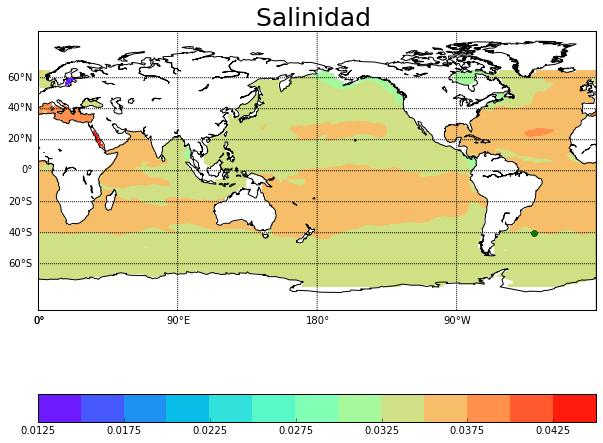

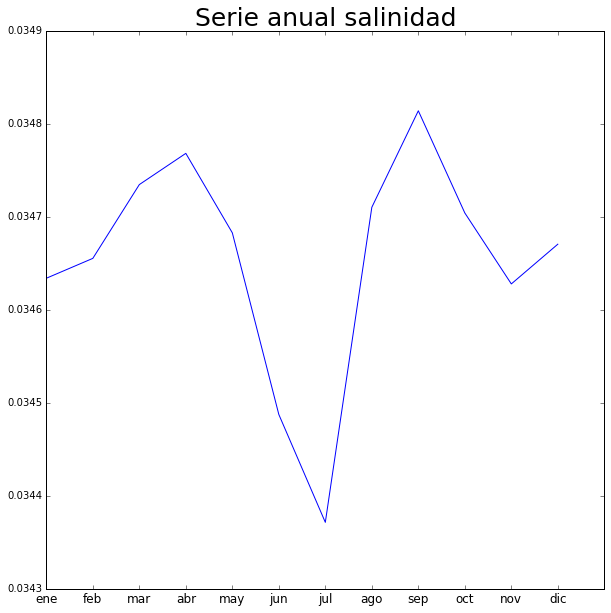

In [14]:
#Salinidad del ESRL de la NOAA - Dibujo un mapa global y serie temporal

import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

anio='1986'

%matplotlib inline
A = netCDF4.Dataset('salt'+anio+'.nc','r') 

print(A.variables.keys()) # Nombres de las variables

lat,lon = A.variables['lat'][:], A.variables['lon'][:] # Defino Latitud y Longitud (tipo array)
time,data = A.variables['time'][:], A.variables['date']
level=A.variables['level']
salt = A.variables['salt'][:] # Defino la sal (tipo array)

mapa_salinidad=plt.figure(figsize=(10,10))
mapproj = bm.Basemap(projection='cyl',
                     llcrnrlat=-90.0, llcrnrlon=0.0,
                     urcrnrlat=90.0, urcrnrlon=360.0)  #defino proyeccion y limites del mapa
mapproj.drawcoastlines()      #dibujo las costas
mapproj.drawparallels(np.array([-60, -40, -20, 0, 20, 40, 60]), labels=[1,0,0,0])    #DIbujo paralelos
mapproj.drawmeridians(np.array([-180, -90, 0, 90, 180]), labels=[0,0,0,1])
lonall, latall = np.meshgrid(lon, lat)        #me creo una grilla
lonproj, latproj = mapproj(lonall, latall)

plt.contourf(lonproj, latproj, salt[8,0,:,:],14,cmap=plt.cm.rainbow)
plt.colorbar(orientation='horizontal')
plt.title('Salinidad ', fontsize=25) # add a title
plt.savefig('mapa_salinidad '+anio, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

seriesal=input('¿Desea obtener una serie temporal de salinidad en un punto determinado?(SI/NO)  ')

if seriesal == 'SI':
    lat_d=input('ingrese latitud° (-90 90) = ')
    lon_d=input('ingrese longitud° (-180 180) = ')
    lat_d=float(lat_d)
    lon_d=float(lon_d)
    lat_definida=((lat_d)*3)+223.5
    lon_definida=((lon_d))
    if lon_definida<0:
        lon_definida=lon_definida+360
    lon_definida=int(lon_definida)
    lat_definida=int(lat_definida)
    
    seriet=salt[:,0,lat_definida,lon_definida]
    mapproj.plot([-10,lon_definida],[10,lat_d],'go')          # ¿?

    serie_temporal = plt.figure(figsize=(10,10))
    t=[]
    for i in range(0,12):
        t.append(i)
    plt.plot(t,seriet)
    plt.title('Serie anual salinidad' ,fontsize=25) # add a title 
    labels = ['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic']
    plt.xticks(t,labels,fontsize=12)
    plt.xticks()
    plt.savefig('Serie temporal ', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

In [1]:
#Este css es trabajo de @LorenaABarba y su grupo
from IPython.core.display import HTML
css_file = '../../css/personal.css'
HTML(open(css_file, "r").read())